In [51]:
import pandas as pd

In [52]:
atlanta_df = pd.read_csv('../Data/Clean/Atlanta.csv')
charlotte_df = pd.read_csv('../Data/Clean/Charlotte.csv')
cincinnati_df = pd.read_csv('../Data/Clean/Cincinnati.csv')
denver_df = pd.read_csv('../Data/Clean/Denver.csv')
indianapolis_df = pd.read_csv('../Data/Clean/Indianapolis.csv')
providence_df = pd.read_csv('../Data/Clean/Providence.csv')

In [53]:
print(atlanta_df.head())
print(charlotte_df.head())
print(cincinnati_df.head())
print(denver_df.head())
print(indianapolis_df.head())
print(providence_df.head())

      DATE  MarketTempIdx  DaysToClose  DaysOnZillow  ListingPriceCutAmt  \
0  2018-01           53.0         35.0          45.0        12315.431363   
1  2018-02           52.0         31.0          40.0        13361.053631   
2  2018-03           53.0         32.0          35.0        13712.279370   
3  2018-04           56.0         32.0          31.0        13456.497756   
4  2018-05           57.0         33.0          30.0        13292.195069   

   ListingPriceCutPct  NewConstructMeanSalePrice  NewConstructSalesCount  \
0            0.160343              298699.954978                  1580.0   
1            0.155572              309807.747078                  1885.0   
2            0.170905              325455.767902                  2384.0   
3            0.185078              324589.131298                  1967.0   
4            0.214794              338943.512924                  1977.0   

   SalesCount      SalePrice  MORTGAGE15US  MORTGAGE30US  RATE_DIFFERENCE  
0      682

In [54]:
print(atlanta_df.isnull().sum())
print(charlotte_df.isnull().sum())
print(cincinnati_df.isnull().sum())
print(denver_df.isnull().sum())
print(indianapolis_df.isnull().sum())
print(providence_df.isnull().sum())

DATE                         0
MarketTempIdx                0
DaysToClose                  0
DaysOnZillow                 0
ListingPriceCutAmt           0
ListingPriceCutPct           0
NewConstructMeanSalePrice    0
NewConstructSalesCount       0
SalesCount                   0
SalePrice                    0
MORTGAGE15US                 0
MORTGAGE30US                 0
RATE_DIFFERENCE              0
dtype: int64
DATE                         0
MarketTempIdx                0
DaysToClose                  0
DaysOnZillow                 0
ListingPriceCutAmt           0
ListingPriceCutPct           0
NewConstructMeanSalePrice    0
NewConstructSalesCount       0
SalesCount                   0
SalePrice                    0
MORTGAGE15US                 0
MORTGAGE30US                 0
RATE_DIFFERENCE              0
dtype: int64
DATE                         0
MarketTempIdx                0
DaysToClose                  0
DaysOnZillow                 0
ListingPriceCutAmt           0
ListingPriceC

In [80]:

# Select the columns that need normalization
#columns_to_normalize = ['DaysToClose', 'DaysOnZillow',  'NewConstructMeanSalePrice', 'NewConstructSalesCount', 'SalesCount', 'MORTGAGE30US']
columns_to_normalize = ['DaysToClose','NewConstructMeanSalePrice', 'NewConstructSalesCount', 'MORTGAGE30US']

In [81]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()

In [82]:
# Apply normalization to each city dataset
atlanta_df[columns_to_normalize] = scaler.fit_transform(atlanta_df[columns_to_normalize])
charlotte_df[columns_to_normalize] = scaler.fit_transform(charlotte_df[columns_to_normalize])
cincinnati_df[columns_to_normalize] = scaler.fit_transform(cincinnati_df[columns_to_normalize])
denver_df[columns_to_normalize] = scaler.fit_transform(denver_df[columns_to_normalize])
indianapolis_df[columns_to_normalize] = scaler.fit_transform(indianapolis_df[columns_to_normalize])
providence_df[columns_to_normalize] = scaler.fit_transform(providence_df[columns_to_normalize])

In [83]:
# Concatenate the data from all cities
combined_data = pd.concat([atlanta_df, charlotte_df, cincinnati_df, denver_df, indianapolis_df, providence_df])

# Drop any rows with missing data after the merge (if applicable)
combined_data.dropna(inplace=True)

In [84]:
# Define the features and the target
features = ['DaysToClose','NewConstructMeanSalePrice', 'NewConstructSalesCount', 'MORTGAGE30US']
target = 'SalePrice'

X = combined_data[features]  # Features
y = combined_data[target]    # Target (SalePrice)

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [86]:
# Split the data into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the training and testing sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(373, 4) (94, 4) (373,) (94,)


In [87]:
# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Print the coefficients to see the feature impacts
print("Model Coefficients:", model.coef_)

Model Coefficients: [-129627.56631395   67889.29507475  -66374.36372072    1840.17892568]


In [88]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 9836186271.191523
R-squared (R²): 0.26605955979443985


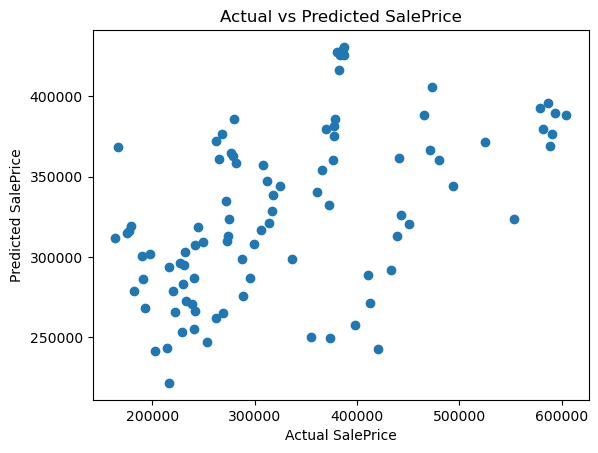

In [89]:
# Create a scatter plot to compare actual vs predicted SalePrice
plt.scatter(y_test, y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()

In [65]:
# from sklearn.preprocessing import StandardScaler

# # Adding more features that could be predictive
# features_extended = ['MarketTempIdx', 'DaysToClose', 'ListingPriceCutPct', 'MORTGAGE30US', 
#                      'DaysOnZillow', 'NewConstructMeanSalePrice', 'SalesCount']

# X_extended = combined_data[features_extended]
# y = combined_data['SalePrice']

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_extended)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - R-squared (R²):", r2_rf)

Random Forest - Mean Squared Error (MSE): 5303015658.7552805
Random Forest - R-squared (R²): 0.6043082613834687


In [67]:
# # Adding additional features to the dataset
# features_extended = ['MarketTempIdx', 'DaysToClose', 'DaysOnZillow', 'ListingPriceCutPct', 
#                      'MORTGAGE30US', 'NewConstructMeanSalePrice', 'SalesCount', 
#                      'ListingPriceCutAmt', 'NewConstructSalesCount', 'RATE_DIFFERENCE']

# X_extended = combined_data[features_extended]
# y = combined_data['SalePrice']

# # Scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X_extended)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [91]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Print evaluation metrics
print("Random Forest - Mean Squared Error (MSE):", mse_rf)
print("Random Forest - R-squared (R²):", r2_rf)


Random Forest - Mean Squared Error (MSE): 5303015658.7552805
Random Forest - R-squared (R²): 0.6043082613834687


In [92]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Evaluate the model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

# Print evaluation metrics
print("Gradient Boosting - Mean Squared Error (MSE):", mse_gb)
print("Gradient Boosting - R-squared (R²):", r2_gb)


Gradient Boosting - Mean Squared Error (MSE): 5353900981.253462
Gradient Boosting - R-squared (R²): 0.6005113837151697


In [93]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Evaluate the model with the best parameters
best_rf_model = grid_search.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)

# Calculate MSE and R-squared
mse_rf_best = mean_squared_error(y_test, y_pred_rf_best)
r2_rf_best = r2_score(y_test, y_pred_rf_best)

print("Tuned Random Forest - Mean Squared Error (MSE):", mse_rf_best)
print("Tuned Random Forest - R-squared (R²):", r2_rf_best)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.1s
[CV] END max_depth=10, min_sa

DaysToClose: 0.3076864995615826
NewConstructMeanSalePrice: 0.262449815842219
NewConstructSalesCount: 0.24958410915005666
MORTGAGE30US: 0.18027957544614187


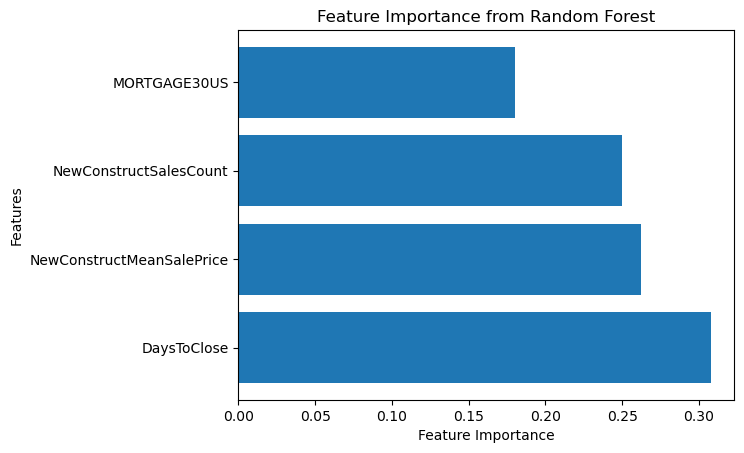

In [94]:
# Feature Importance for Random Forest
importances = best_rf_model.feature_importances_
feature_names = X.columns

# Display feature importances
for feature, importance in zip(feature_names, importances):
    print(f'{feature}: {importance}')

# You can plot feature importance for better visualization
import matplotlib.pyplot as plt
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance from Random Forest')
plt.show()


In [72]:
# from sklearn.preprocessing import PolynomialFeatures

# # Create polynomial features
# poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
# X_poly = poly.fit_transform(X_scaled)

# # Train the model with the new polynomial features
# X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [73]:
# y

In [74]:
# # Train the model
# model_poly = LinearRegression()
# model_poly.fit(X_train_poly, y_train_poly)

In [75]:
# # Make predictions
# y_pred_poly = model_poly.predict(X_test_poly)


In [76]:
# # Evaluate the model
# mse_poly = mean_squared_error(y_test_poly, y_pred_poly)
# r2_poly = r2_score(y_test_poly, y_pred_poly)


# print(f"Mean Squared Error (MSE) for Polynomial Features Model: {mse_poly}")
# print(f"R-squared Score for Polynomial Features Model: {r2_poly}")

In [77]:
# from sklearn.linear_model import Ridge
# model_ridge = Ridge(alpha=1.0)  # You can tune alpha
# model_ridge.fit(X_train_poly, y_train_poly)
# y_pred_ridge = model_ridge.predict(X_test_poly)

# # Evaluate the Ridge model
# mse_ridge = mean_squared_error(y_test_poly, y_pred_ridge)
# r2_ridge = r2_score(y_test_poly, y_pred_ridge)

# print(f"Mean Squared Error (MSE) for Ridge Regression Model: {mse_ridge}")
# print(f"R-squared Score for Ridge Regression Model: {r2_ridge}")


In [78]:
# from sklearn.linear_model import Lasso
# model_lasso = Lasso(alpha=1.0)
# model_lasso.fit(X_train_poly, y_train_poly)
# y_pred_lasso = model_lasso.predict(X_test_poly)

# # Evaluate Lasso model
# mse_lasso = mean_squared_error(y_test_poly, y_pred_lasso)
# r2_lasso = r2_score(y_test_poly, y_pred_lasso)

# print(f"Mean Squared Error (MSE) for Lasso Regression Model: {mse_lasso}")
# print(f"R-squared Score for Lasso Regression Model: {r2_lasso}")
